In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import popsynch as ps
import matplotlib.pyplot as plt

## Finite State Spaces

#### Uniform Circular State Space

In [2]:
# We can explicitly construct the distance matrix for a finite circular state space with n_states uniformly-spaced states.
# Adjacent states are a distance 1/n_states from one another.

n_states = 5
ps.discrete_uniform_circ_state_dm(n_states)

array([[0. , 0.2, 0.4, 0.4, 0.2],
       [0.2, 0. , 0.2, 0.4, 0.4],
       [0.4, 0.2, 0. , 0.2, 0.4],
       [0.4, 0.4, 0.2, 0. , 0.2],
       [0.2, 0.4, 0.4, 0.2, 0. ]])

In [3]:
# On the uniform discretization of the circle the uniform distribution has maximal generalized variance and so has synchrony = 0.

n_states = 5
mu = np.ones(n_states)/n_states

synchrony, barycenter = ps.discrete_uniform_circ_synchrony(mu)
print(f'Synchrony: {synchrony}, Barycenter: {barycenter}')

Synchrony: 0.0, Barycenter: 0


In [4]:
# A delta distribution is perfectly synchronized and has synchrony = 1.

n_states = 5
pi = np.zeros(n_states)
pi[4] = 1

synchrony, barycenter = ps.discrete_uniform_circ_synchrony(pi)
print(f'Synchrony: {synchrony}, Barycenter: {barycenter}')

Synchrony: 1.0, Barycenter: 4


In [5]:
# Any other distribution will have 0 < synchrony < 1

n_states = 5
pi = np.random.rand(n_states)
pi = pi/pi.sum()

synchrony, barycenter = ps.discrete_uniform_circ_synchrony(pi)
print(pi)
print(f'Synchrony: {synchrony}, Barycenter: {barycenter}')

[0.25094136 0.06067072 0.35013566 0.31257534 0.02567693]
Synchrony: 0.13984908345060043, Barycenter: 2


#### Non-Uniform Circular State Space

In [6]:
# We can explicitly construct the distance matrix for a finite circular state space with n_states states that are not uniformly spaced. 
# States correspond to arcs [a_i,a_{i+1}), i=0,...,n_states-1, and distances are arc lengths between midpoints of arcs. 

thresholds = [0, 1/2, 3/4, 1]
ps.discrete_general_circ_state_dm(thresholds)

array([[0.   , 0.375, 0.375],
       [0.375, 0.   , 0.25 ],
       [0.375, 0.25 , 0.   ]])

In [7]:
# We use a linear program to find the maximal generalized variance of any distribution on a non-uniform circular state space

thresholds = [0, 1/2, 3/4, 1]
D = ps.discrete_general_circ_state_dm(thresholds)
C = D*D

# returns the maximal generalized variance and a distribution which realizes it
max_variance, pi_star = ps.finite_state_normalization(C)
print(f'Maximal Variance: {max_variance}, pi*: {pi_star}')

Maximal Variance: 0.0791015625, pi*: [0.4375  0.28125 0.28125]


In [8]:
# The uniform distribution on this space does not have maximal generalized variance, and so has synchrony > 0
# which we can compute directly
mu = np.array([1/3,1/3,1/3])

variance = min(np.dot(C,mu))

print(f'Synchrony of the uniform distribution: {1-np.sqrt(variance/max_variance)}')

Synchrony of the uniform distribution: 0.07481511134838548


#### Random State Space (Euclidean Point Cloud)

In [9]:
# We can construct a state space from a finite subset of R^n (a point cloud) with the distance between states
# being the Euclidean distance between points. The normalization constant is again computed using a linear program that ingests the 
# Wasserstein-2 cost matrix encoding the squared distances between points.

n_states = 20
dimension = 2
M = np.random.rand(n_states, dimension)

D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(M, metric='euclidean'))
C = D*D

max_variance, pi_star = ps.finite_state_normalization(C)
print(f'Maximal Variance: {max_variance}, pi*: {pi_star}')

Maximal Variance: 0.31980242838164086, pi*: [0.         0.         0.55287687 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.44712313 0.         0.         0.         0.         0.
 0.         0.        ]


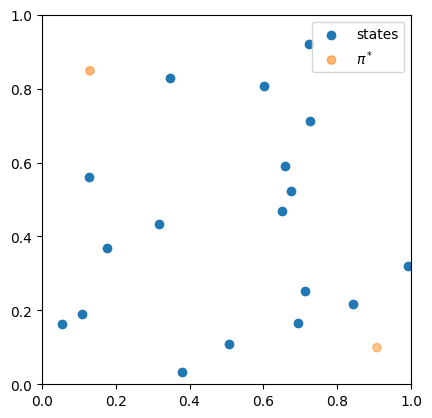

In [10]:
# The distribution with maximal variance often appears supported on the points which intersect the smallest bounding circle of the cloud.

plt.scatter(M[np.delete(np.arange(n_states),np.where(pi_star)),0], M[np.delete(np.arange(n_states),np.where(pi_star)),1], label='states')
plt.scatter(M[np.where(pi_star),0], M[np.where(pi_star),1], alpha=pi_star[np.where(pi_star)], label=r'$\pi^*$')
plt.gca().set_xlim(0,1)
plt.gca().set_ylim(0,1)
plt.gca().set_aspect(1)
plt.legend()